In [8]:
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib
import keras
import numpy as np
import matplotlib.pyplot as plt

# Load training data
df = pd.read_csv('cola_data.csv')
dataset = df.values

df_test = pd.read_csv('cola_Testdata.csv')
testdataset = df_test.values

X = dataset[:,0:4]
X_test = testdataset[:,0:4]

Y = dataset[:,4:7]
Y_test = testdataset[:,4:7]

In [16]:
# Split data into traning and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3)
print(X.shape,X_train.shape, X_val.shape, Y.shape,Y_train.shape, Y_val.shape)

(999, 4) (699, 4) (300, 4) (999, 3) (699, 3) (300, 3)


array([[2.83550005, 3.50339243, 1.281304  ],
       [3.00907082, 3.71773446, 1.35945489],
       [3.24017678, 4.00173635, 1.46189181],
       ...,
       [2.77923888, 3.43393431, 1.2559513 ],
       [2.84290207, 3.51242718, 1.28451848],
       [3.24374676, 4.008     , 1.46611854]])

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model
rf.fit(X, Y);

In [20]:
# GradientBoosting 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=1000, random_state = 42))

gbr.fit(X, Y);

In [21]:
# Use the forest's predict method on the test data
Y_pred = gbr.predict(X_test)

# Calculate the absolute and mean squared errors
mae = np.mean(abs(Y_pred - Y_test))
mse = np.mean((Y_pred - Y_test)**2)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Mean Absolute Error: 0.03414476870125216
Mean Squared Error: 0.004342382345705368


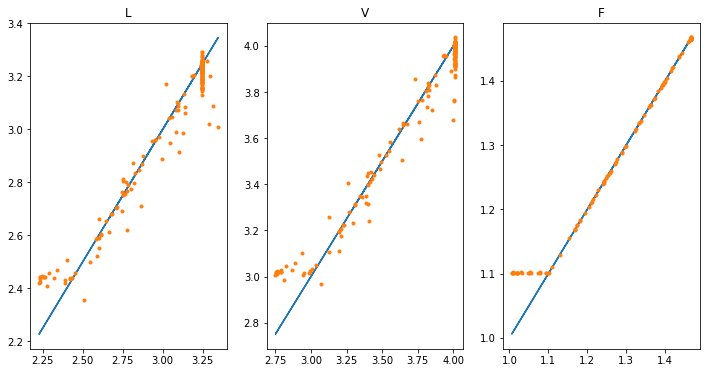

In [22]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                                       sharex=False, figsize=(12, 6))
ax1.set_title('L')
ax1.plot(Y_test[:,0],Y_test[:,0])
ax1.plot(Y_test[:,0],Y_pred[:,0],'.')

ax2.set_title('V')
ax2.plot(Y_test[:,1],Y_test[:,1])
ax2.plot(Y_test[:,1],Y_pred[:,1],'.')

ax3.set_title('F')
ax3.plot(Y_test[:,2],Y_test[:,2])
ax3.plot(Y_test[:,2],Y_pred[:,2],'.')